In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pprint import pprint
import pickle
import time
import datetime
%matplotlib inline

In [2]:
with open("run_trotter_9-qubit_dm.pkl", "rb") as f:
    run_trotter_5_qubit_dm = pickle.load(f)
with open("run_trotter_9-qubit_proposed.pkl", "rb") as f:
    run_trotter_5_qubit_proposed = pickle.load(f)

In [3]:
num_steps_list = run_trotter_5_qubit_dm["num_steps_list"]
fidelities_trotter = run_trotter_5_qubit_dm["fidelities"]
nums_cnots_trotter = run_trotter_5_qubit_dm["nums_cnots"]

In [4]:
num_steps_list = run_trotter_5_qubit_proposed["num_steps_list"]
fidelities_proposed = run_trotter_5_qubit_proposed["fidelities"]
nums_cnots_proposed = run_trotter_5_qubit_proposed["nums_cnots"]

<Figure size 640x480 with 0 Axes>

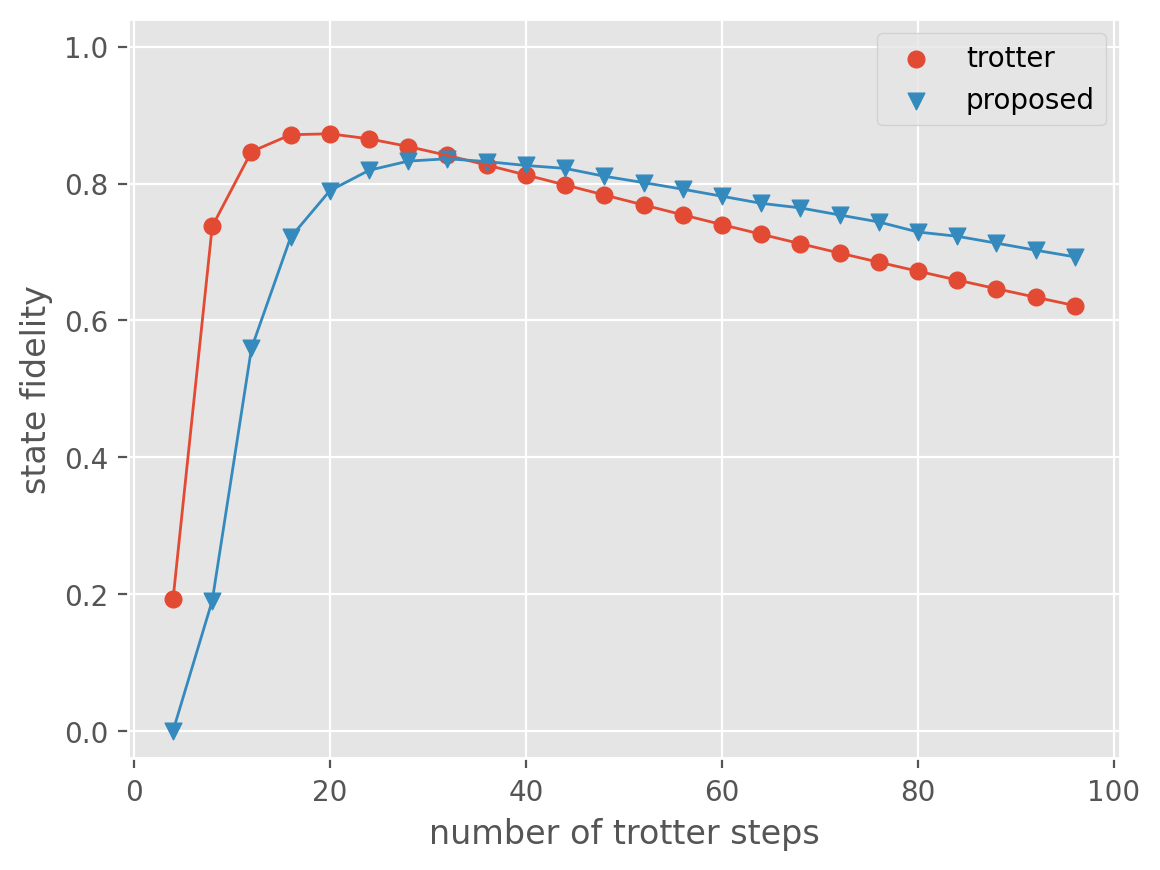

In [5]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(num_steps_list, fidelities_trotter, marker="o")
plt.plot(num_steps_list, fidelities_trotter,linewidth=1)
p2 = plt.scatter(num_steps_list, fidelities_proposed, marker="v")
plt.plot(num_steps_list, fidelities_proposed,linewidth=1)
# plt.scatter(num_steps_list[:limit], e2d2_fidelities[:limit], marker="x")
plt.xlabel("number of trotter steps")
plt.ylabel("state fidelity")
plt.ylim(bottom=-0.04,top=1.04)
plt.legend([p1, p2], ["trotter", "proposed"]) # , "shallow encoding and shallow decoding"))
plt.show()
# plt.title("The effect of encoding and decoding strategy")

<Figure size 640x480 with 0 Axes>

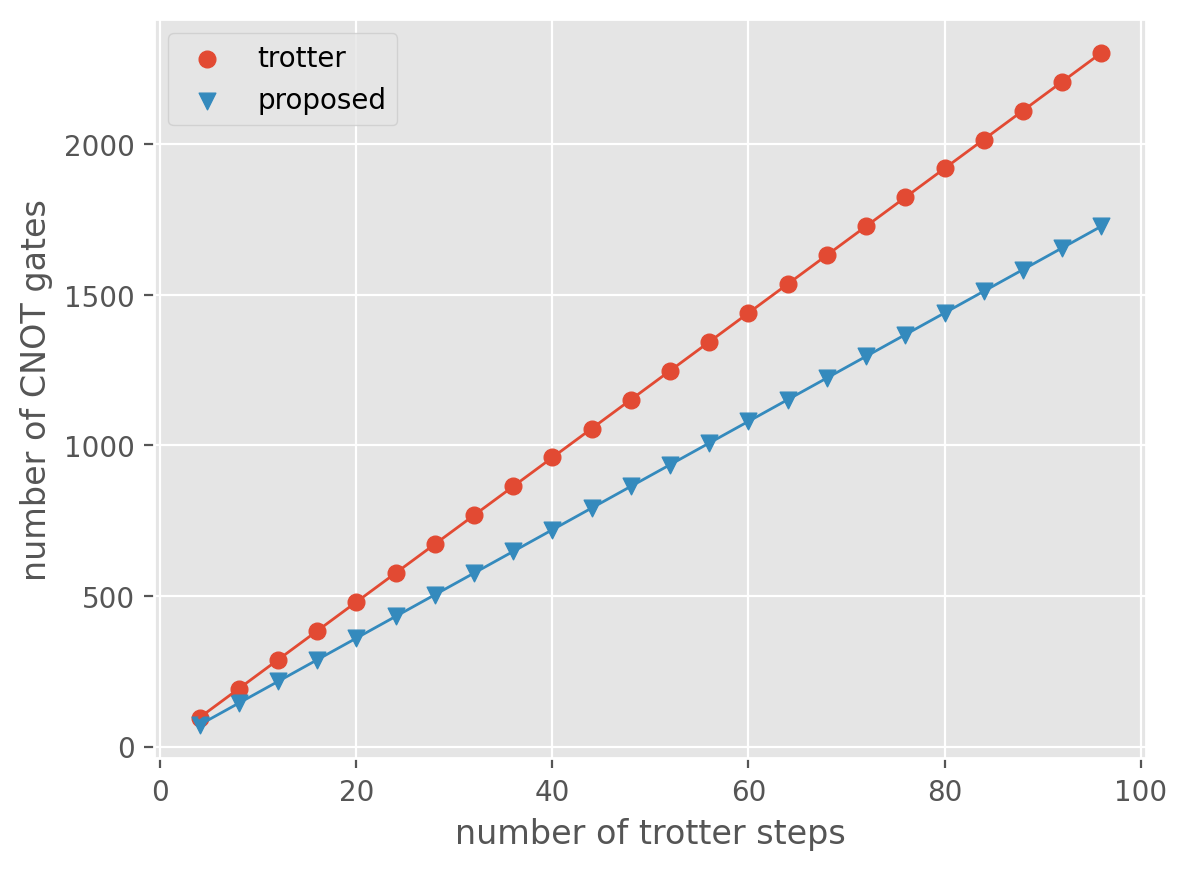

In [6]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(num_steps_list, nums_cnots_trotter, marker="o")
plt.plot(num_steps_list, nums_cnots_trotter,linewidth=1)
p2 = plt.scatter(num_steps_list, nums_cnots_proposed, marker="v")
plt.plot(num_steps_list, nums_cnots_proposed,linewidth=1)
plt.xlabel("number of trotter steps")
plt.ylabel("number of CNOT gates")
# plt.ylim(bottom=-0.04,top=1.04)
plt.legend([p1, p2], ["trotter", "proposed"])
plt.show()
# plt.title("The effect of encoding and decoding strategy")

<Figure size 640x480 with 0 Axes>

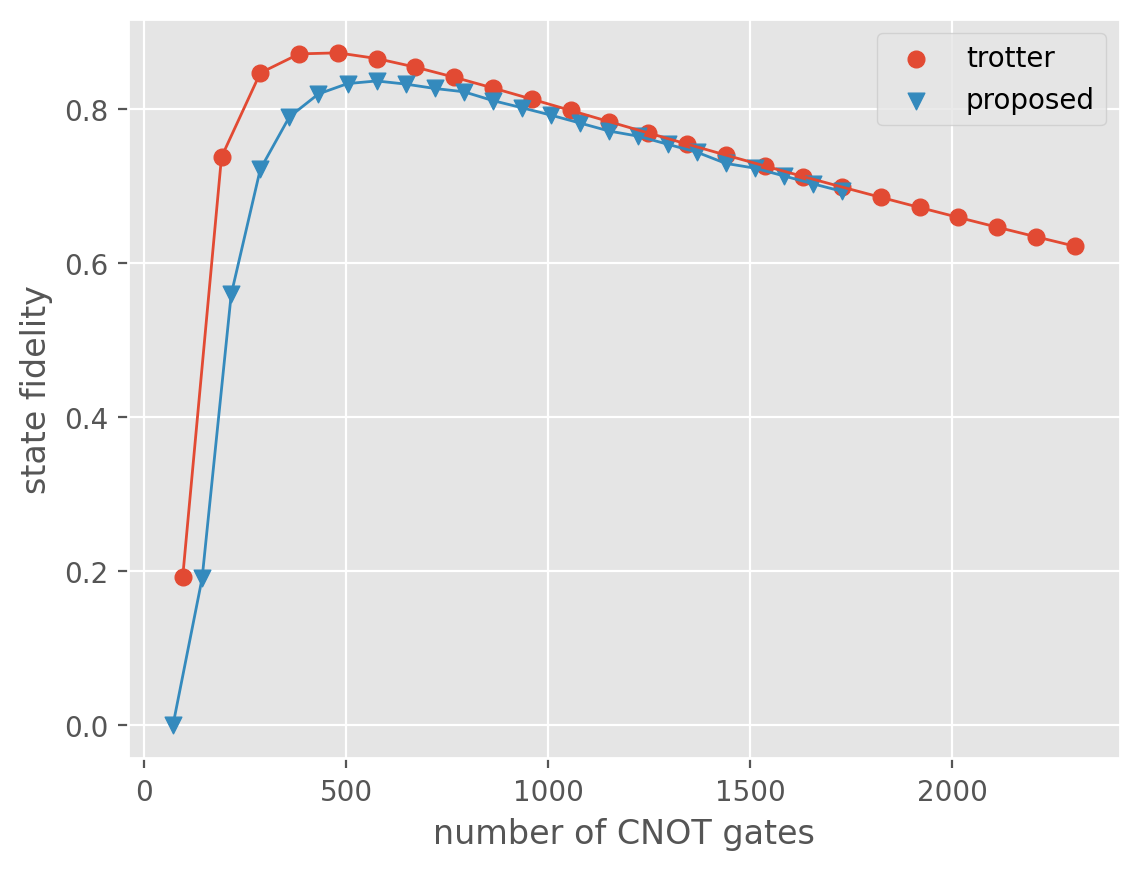

In [7]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(nums_cnots_trotter, fidelities_trotter, marker="o")
plt.plot(nums_cnots_trotter, fidelities_trotter, linewidth=1)
p2 = plt.scatter(nums_cnots_proposed, fidelities_proposed, marker="v")
plt.plot(nums_cnots_proposed, fidelities_proposed, linewidth=1)
plt.xlabel("number of CNOT gates")
plt.ylabel("state fidelity")
# plt.ylim(bottom=-0.04,top=1.04)
plt.legend([p1, p2], ["trotter", "proposed"])
plt.show()
# plt.title("The effect of encoding and decoding strategy")